Imports and configs

In [ ]:
%pip install nflfastpy --upgrade
%pip install nfl_data_py --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.7 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
  Created wheel for nfl-data-py: filename=nfl_data_py-0.2.11-py3-none-any.whl size=24691 sha256=cd1198244767041280b8972c2c1874c604f1aa1ef5dd43713910428210d778e1
  Stored in directory: /root/.cache/pip/wheels/1b/70/f3/978128d8c3ae18c63f88c5ecb755232aefeedc16743bbf70f3
Successfully built nfl-data-py
  Attempting uninstall: nfl-data-py
    Found existing installation: nfl-data-py 0.2.8
    Uninstalling nfl-data-py-0.2.8:
      Successfully uninstalled nfl-data-py-0.2.8


In [ ]:
# coding: utf-8
import argparse
import time
import math
import torch
import torch.nn as nn
from torch.autograd import Variable

parser = argparse.ArgumentParser(description='PyTorch Wikitext-2 RNN/LSTM Language Model')
parser.add_argument('--data', type=str, default='./data/wikitext-2',
                    help='location of the data corpus')
parser.add_argument('--model', type=str, default='LSTM',
                    help='type of recurrent net (RNN_TANH, RNN_RELU, LSTM, GRU)')
parser.add_argument('--emsize', type=int, default=200,
                    help='size of word embeddings')
parser.add_argument('--nhid', type=int, default=200,
                    help='number of hidden units per layer')

_StoreAction(option_strings=['--nhid'], dest='nhid', nargs=None, const=None, default=200, type=<class 'int'>, choices=None, help='number of hidden units per layer', metavar=None)

In [ ]:
## Imports 

# Numpy 
import numpy as np
from numpy import hstack
from numpy import array

# Matplotlib
import matplotlib.pyplot as plt

# Pandas
import pandas as pd
from pandas import DataFrame
from pandas import concat

# Torch
import torch
import torch.nn as nn
from torch.autograd import Variable

# Sklearn
from sklearn.preprocessing import MinMaxScaler

# NFL 
import nflfastpy as nfl
import nfl_data_py as nfl_data

In [ ]:
## Options

# Pandas
pd.set_option('display.max_columns', None)

Getting the data

In [ ]:
## 2021 Play by play data loading

# Loading data into data frame
# nfl_pbp_data_2021 =  nfl.load_pbp_data(2021)
# nfl_pbp_data_2021 

In [ ]:
## 2019 - 2021 Play by play data loading

# Loading data into data frame

seasons = [2019, 2020, 2021]
nfl_pbp_data_2019_2021 = nfl_data.import_pbp_data(seasons)
nfl_pbp_data_2019_2021

2019 done.
2020 done.
2021 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [ ]:
nfl_pbp_data_2021 = nfl_pbp_data_2019_2021

In [ ]:
## 2021 Roster data loading

# Loading data into data frame
# nfl_roster_data_2021 = nfl.load_roster_data(2021)
seasons = [2019, 2020, 2021]

nfl_roster_data_2021 = nfl_data.import_rosters(seasons)
nfl_roster_data_2021 

,season,team,position,depth_chart_position,jersey_number,status,player_name,first_name,last_name,birth_date,height,weight,college,player_id,espn_id,sportradar_id,yahoo_id,rotowire_id,pff_id,pfr_id,fantasy_data_id,sleeper_id,years_exp,headshot_url,ngs_position,week,game_type,status_description_abbr,football_name,esb_id,gsis_it_id,smart_id,entry_year,rookie_year,draft_club,draft_number
0,2019,ARI,DB,CB,21.0,Active,Patrick Peterson,Patrick,Peterson,1990-07-11,73,203.0,Louisiana State,00-0027943,13980,9f3b934e-52d6-4e16-ae92-d3e60be10493,24792,7300,6157,PetePa00,13415,972,8.0,https://static.www.nfl.com/image/private/f_aut...,CB,17,REG,A01,Patrick,PET415511,37078,32005045-5441-5511-6ae6-059d8eb99a8d,2011.0,2011.0,ARI,5.0
1,2019,ARI,DB,SS,38.0,Active,Chris Banjo,Ayorunmi,Banjo,1990-02-26,70,207.0,Southern Methodist,00-0029747,15782,6c7704c2-f833-46aa-9f9c-d975d5ad1297,26621,9101,8419,None,15011,1442,6.0,https://static.www.nfl.com/image/private/f_aut...,SLOT_CB,17,REG,A01,Chris,BAN373418,39941,32004241-4e37-3418-7494-6de47748ece8,2013.0,2013.0,None,NaN
2,2019,ARI,DB,CB,23.0,None,Robert Alford,Robert,Alford,1988-11-01,70,186.0,Southeastern Louisiana,00-0030528,15817,4f5ca039-21f3-4045-9c2e-c0b4d5d564c5,26683,8645,7841,AlfoRo00,15177,1540,NaN,https://static.www.nfl.com/image/private/f_aut...,None,17,REG,None,Robert,ALF657259,40008,3200414c-4665-7259-40dd-f718260bdef4,NaN,NaN,None,NaN
3,2019,ARI,DB,CB,27.0,None,Josh Shaw,Josh,Shaw,1992-03-27,73,197.0,USC,00-0032168,2971605,1686f2b7-90e8-4d0a-89f8-415310ae2bd8,28508,10420,9553,ShawJo00,16881,2425,NaN,https://static.www.nfl.com/image/private/f_aut...,None,17,REG,None,Josh,SHA641197,42463,32005348-4164-1197-1f13-5052489b8352,NaN,NaN,None,NaN
4,2019,ARI,DB,CB,26.0,None,Brandon Williams,Brandon,Williams,1992-09-09,72,200.0,Texas A&amp;M,00-0032769,2972286,cdb10720-0d41-4cb6-9fb8-c00713754a1e,27103,10901,10726,WillBr07,15561,1696,NaN,https://static.www.nfl.com/image/private/f_aut...,None,17,REG,None,Brandon,WIL000008,43381,32005749-4c00-0008-92f3-c750b3b2ae42,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,2021,WAS,WR,WR,17.0,Active,Terry McLaurin,Terry,McLaurin,1995-09-15,72,210.0,Ohio State,00-0035659,3121422,7e8c4641-2beb-4213-ba22-69fe0307005f,31908,13536,48229,McLaTe00,20873,5927,2.0,https://static.www.nfl.com/image/private/f_aut...,WR,18,REG,A01,Terry,MCL278328,47859,32004d43-4c27-8328-8097-b130ba0e8060,2019.0,2019.0,WAS,76.0
3044,2021,WAS,WR,WR,13.0,PS; Exc,Kelvin Harmon,Kelvin,Harmon,1996-12-15,74,213.0,North Carolina State,00-0035297,4036163,d3cc6f89-56d8-45e9-87f0-3a1a56f97bc6,32038,13428,47931,HarmKe00,20789,5884,2.0,https://static.www.nfl.com/image/private/f_aut...,None,18,REG,P06,Kelvin,HAR206185,47989,32004841-5220-6185-a2b0-6140674f568a,2019.0,2019.0,WAS,206.0
3045,2021,WAS,WR,WR,18.0,Practice Squad,Antonio Gandy-Golden,Antonio,Gandy-Golden,1998-04-11,76,220.0,Liberty,00-0036340,4029893,7bb0744a-c93f-401b-9091-2a34072a40c2,32812,14568,39993,GandAn00,21742,6906,1.0,https://static.www.nfl.com/image/private/f_aut...,None,18,REG,P01,Antonio,GAN139028,52550,32004741-4e13-9028-ffdd-34109916cfd5,2020.0,2020.0,WAS,142.0
3046,2021,WAS,WR,WR,2.0,Active,Dyami Brown,Dyami,Brown,1999-11-01,72,185.0,None,00-0036626,4361577,0fb60ada-bdd3-4d74-8c98-058303a1649a,33470,15274,77986,BrowDy00,None,7587,0.0,https://static.www.nfl.com/image/private/f_aut...,WR,18,REG,A01,Dyami,BRO408220,53511,32004252-4f40-8220-1974-8f5000372de2,2021.0,2021.0,WAS,82.0


In [ ]:
## Single player sampling
# player = nfl_roster_data_2021.loc[nfl_roster_data_2021['last_name'] == 'McCarron']
player = nfl_roster_data_2021.loc[nfl_roster_data_2021['player_id'] == '00-0027891']
player

,season,team,position,depth_chart_position,jersey_number,status,player_name,first_name,last_name,birth_date,height,weight,college,player_id,espn_id,sportradar_id,yahoo_id,rotowire_id,pff_id,pfr_id,fantasy_data_id,sleeper_id,years_exp,headshot_url,ngs_position,week,game_type,status_description_abbr,football_name,esb_id,gsis_it_id,smart_id,entry_year,rookie_year,draft_club,draft_number
2562,2019,NYG,WR,WR,15.0,Active,Golden Tate,Golden,Tate,1988-08-02,71,197.0,Notre Dame,00-0027891,13217,c88d9352-b835-45ed-a909-1cfec09a58bc,24035,6389,5585,TateGo00,11611,642,9.0,https://static.www.nfl.com/image/private/f_aut...,SLOT_WR,17,REG,A01,Golden,TAT245022,35499,32005441-5424-5022-18f3-b9b5433de8e5,2010.0,2010.0,SEA,60.0
2190,2020,NYG,WR,WR,15.0,Active,Golden Tate,Golden,Tate,1988-08-02,71,197.0,Notre Dame,00-0027891,13217,c88d9352-b835-45ed-a909-1cfec09a58bc,24035,6389,5585,TateGo00,11611,642,10.0,https://static.www.nfl.com/image/private/f_aut...,None,17,REG,A01,Golden,TAT245022,35499,32005441-5424-5022-18f3-b9b5433de8e5,2010.0,2010.0,SEA,60.0


In [ ]:
## Loading defense data

# Reading Defense CSV from Google Drive (Source: https://www.pro-football-reference.com/years/2021/fantasy-points-against-WR.htm)
defense_data_2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Digethic/Projektarbeit/Data/DefenseVsWR2021.csv", sep = ';')
defense_data_2021.set_index("Team", inplace=True)

defense_data_2021

,Name,Rank,G,Tgt,Rec,Yds,TD,FantPt,DKPt,FDPt,FantPt.1,DKPt.1,FDPt.1
Team,,,,,,,,,,,,,
MIN,Minnesota Vikings,32,17,385,251,3280,19,470.90,762.9,602.4,27.7,44.9,35.4
TEN,Tennessee Titans,31,17,390,248,3210,20,450.90,712.2,574.2,26.5,41.9,33.8
BAL,Baltimore Ravens,30,17,350,214,3119,20,439.50,675.5,546.5,25.9,39.7,32.1
ARI,Arizona Cardinals,29,17,342,216,2576,27,430.74,658.7,540.7,25.3,38.7,31.8
WAS,Washington Football Team,28,17,339,228,2926,19,408.40,642.8,521.8,24.0,37.8,30.7
ATL,Atlanta Falcons,27,17,345,229,2682,19,407.70,642.5,522.0,24.0,37.8,30.7
CHI,Chicago Bears,26,17,281,184,2578,23,403.00,607.0,495.0,23.7,35.7,29.1
HOU,Houston Texans,25,17,327,210,2877,16,401.60,628.6,506.6,23.6,37.0,29.8
DAL,Dallas Cowboys,24,17,356,200,2870,16,399.48,621.5,499.5,23.5,36.6,29.4


In [ ]:
## Loading Passser rating data 2021

# Reading Defense CSV from Google Drive (Source: https://www.pro-football-reference.com/years/2021/passing.htm)
passer_data_2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Digethic/Projektarbeit/Data/QBRating2021.csv", sep = ';')

# Getting player IDs from the roster data frame 
passer_ids = []
for value in passer_data_2021["Player"]:
  id = nfl_roster_data_2021.loc[(nfl_roster_data_2021['player_name'] == value) & (nfl_roster_data_2021['depth_chart_position'].isin(['QB','RB','WR','TE','P','K'])), 'player_id'].squeeze()
  if type(id) != str:
    id = id.iloc[0]
  if value == 'Josh Johnson':
    id = '00-0026300'
  passer_ids.append(id)
passer_data_2021["passer_player_id"] = passer_ids 

passer_data_2021.set_index("passer_player_id", inplace=True)
passer_data_2021

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A
passer_player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00-0019596,1,Tom Brady,TB,44,QB,17,17,13-4-0,485,719,67.5,5316,43,6.0,12,1.7,269,62,7.4,7.8,11.0,312.7,102.1,68.1,22,144,3.0,6.98,7.41
00-0036355,2,Justin Herbert,LAC,23,QB,17,17,9-8-0,443,672,65.9,5014,38,5.7,15,2.2,256,72,7.5,7.6,11.3,294.9,97.7,65.6,31,214,4.4,6.83,6.95
00-0026498,3,Matthew Stafford,LAR,33,QB,17,17,12-5-0,404,601,67.2,4886,41,6.8,17,2.8,233,79,8.1,8.2,12.1,287.4,102.9,63.8,30,243,4.8,7.36,7.45
00-0033873,4,Patrick Mahomes,KC,26,QB,17,17,12-5-0,436,658,66.3,4839,37,5.6,13,2.0,260,75,7.4,7.6,11.1,284.6,98.5,62.2,28,146,4.1,6.84,7.07
00-0031280,5,Derek Carr,LV,30,QB,17,17,10-7-0,428,626,68.4,4804,23,3.7,14,2.2,217,61,7.7,7.4,11.2,282.6,94.0,52.4,40,241,6.0,6.85,6.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00-0034955,112,Brett Rypien,DEN,25,NaN,1,0,NaN,0,2,0.0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,39.6,1.1,0,0,0.0,0.00,0.00
00-0036275,113,D'Andre Swift,DET,22,rb,13,4,NaN,0,1,0.0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,39.6,0.5,0,0,0.0,0.00,0.00
00-0030669,114,Albert Wilson,MIA,29,wr,14,5,NaN,0,1,0.0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,39.6,0.0,1,1,50.0,-0.50,-0.50


In [ ]:
## Loading Passser rating data 2020

# Reading Defense CSV from Google Drive (Source: https://www.pro-football-reference.com/years/2021/passing.htm)
passer_data_2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Digethic/Projektarbeit/Data/QBRating2020.csv", sep = ';')

# Getting player IDs from the roster data frame 
passer_ids = []
for value in passer_data_2020["Player"]:
  id = nfl_roster_data_2021.loc[(nfl_roster_data_2021['player_name'] == value) & (nfl_roster_data_2021['depth_chart_position'].isin(['QB','RB','WR','TE','P','K'])), 'player_id'].squeeze()
  if type(id) != str:
    id = id.iloc[0]
  if value == 'Josh Johnson':
    id = '00-0026300'
  passer_ids.append(id)
passer_data_2020["passer_player_id"] = passer_ids 

passer_data_2020.set_index("passer_player_id", inplace=True)
passer_data_2020

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A
passer_player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00-0033537,1,Deshaun Watson,HOU,25,QB,16,16,4-12-0,382,544,70.2,4823,33,6.1,7,1.3,221,77,8.9,9.5,12.6,301.4,112.4,63.7,49,293,8.3,7.64,8.22
00-0033873,2,Patrick Mahomes,KAN,25,QB,15,15,14-1-0,390,588,66.3,4740,38,6.5,6,1.0,238,75,8.1,8.9,12.2,316.0,108.2,78.1,22,147,3.6,7.53,8.33
00-0019596,3,Tom Brady,TAM,43,QB,16,16,11-5-0,401,610,65.7,4633,40,6.6,12,2.0,233,50,7.6,8.0,11.6,289.6,102.2,66.0,21,143,3.3,7.12,7.53
00-0026143,4,Matt Ryan,ATL,35,QB,16,16,4-12-0,407,626,65.0,4581,26,4.2,11,1.8,242,63,7.3,7.4,11.3,286.3,93.3,59.8,41,257,6.1,6.48,6.52
00-0034857,5,Josh Allen,BUF,24,QB,16,16,13-3-0,396,572,69.2,4544,37,6.5,10,1.7,228,55,7.9,8.5,11.5,284.0,107.2,76.6,26,159,4.3,7.33,7.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00-0025825,108,Brett Kern,TEN,34,NaN,13,0,NaN,0,1,0.0,0,0,0.0,0,0.0,0,0,0.0,0.0,NaN,0.0,39.6,0.0,0,0,0.0,0.00,0.00
00-0034827,109,D.J. Moore,CAR,23,WR,15,14,NaN,0,1,0.0,0,0,0.0,0,0.0,0,0,0.0,0.0,NaN,0.0,39.6,NaN,0,0,0.0,0.00,0.00
00-0033251,110,Zach Pascal,IND,26,WR,16,14,NaN,0,1,0.0,0,0,0.0,0,0.0,0,0,0.0,0.0,NaN,0.0,39.6,1.8,0,0,0.0,0.00,0.00


In [ ]:
## Loading Passser rating data 2019

# Reading Defense CSV from Google Drive (Source: https://www.pro-football-reference.com/years/2021/passing.htm)
passer_data_2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Digethic/Projektarbeit/Data/QBRating2019.csv", sep = ';')

# Getting player IDs from the roster data frame 
passer_ids = []
for value in passer_data_2019["Player"]:
  id = nfl_roster_data_2021.loc[(nfl_roster_data_2021['player_name'] == value) & (nfl_roster_data_2021['depth_chart_position'].isin(['QB','RB','WR','TE','P','K'])), 'player_id'].squeeze()
  if type(id) != str:
    id = id.iloc[0]
  if value == 'Josh Johnson':
    id = '00-0026300'
  passer_ids.append(id)
passer_data_2019["passer_player_id"] = passer_ids 

passer_data_2019.set_index("passer_player_id", inplace=True)
passer_data_2019

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A
passer_player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00-0031503,1,Jameis Winston,TAM,25,QB,16,16,7-9-0,380,626,60.7,5109,33,5.3,30,4.8,243,71,8.2,7.1,13.4,319.3,84.3,55.7,47,282,7.0,7.17,6.15
00-0033077,2,Dak Prescott,DAL,26,QB,16,16,8-8-0,388,596,65.1,4902,30,5.0,11,1.8,229,62,8.2,8.4,12.6,306.4,99.7,71.9,23,151,3.7,7.68,7.84
00-0033106,3,Jared Goff,LAR,25,QB,16,16,9-7-0,394,626,62.9,4638,22,3.5,16,2.6,220,66,7.4,7.0,11.8,289.9,86.5,50.6,22,170,3.4,6.90,6.46
00-0022942,4,Philip Rivers,LAC,38,QB,16,16,5-11-0,390,591,66.0,4615,23,3.9,20,3.4,217,84,7.8,7.1,11.8,288.4,88.5,50.5,34,222,5.4,7.03,6.32
00-0026143,5,Matt Ryan,ATL,34,QB,15,15,7-8-0,408,616,66.2,4466,26,4.2,14,2.3,228,93,7.3,7.1,10.9,297.7,92.1,59.6,48,316,7.2,6.25,6.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00-0033280,98,Christian McCaffrey,CAR,23,RB,16,16,NaN,0,2,0.0,0,0,0.0,0,0.0,0,0,0.0,0.0,NaN,0.0,39.6,0.2,0,0,0.0,0.00,0.00
00-0033251,99,Zach Pascal,IND,25,WR,16,13,NaN,0,1,0.0,0,0,0.0,0,0.0,0,0,0.0,0.0,NaN,0.0,39.6,0.8,0,0,0.0,0.00,0.00
00-0028064,100,Bilal Powell,NYJ,31,/rb,13,1,NaN,0,1,0.0,0,0,0.0,0,0.0,0,0,0.0,0.0,NaN,0.0,39.6,1.9,0,0,0.0,0.00,0.00


In [ ]:
## Filtering play by play data

# Filtering for only relevant columns
nfl_pbp_data_2021 = nfl_pbp_data_2021[['game_id', 'home_team', 'away_team', 'season_type', 'week', 'posteam', 
                                       'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date',
                                       'yards_gained', 'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
                                       'incomplete_pass', 'interception', 'pass_attempt', 'fumble', 'complete_pass', 'touchdown',
                                       'passer_player_id', 'passer_player_name', 'passing_yards', 'receiver_player_id',
                                       'receiver_player_name', 'receiving_yards', 'start_time', 'time_of_day', 'season', 'weather']]
# side_of_field	#kann auch 50 sein

# Filtering for only pass attempts
nfl_pbp_pass_data_2021 = nfl_pbp_data_2021.loc[nfl_pbp_data_2021['pass_attempt'] == 1]

# Drop rows where the receiver is not known (most likely errors)
nfl_pbp_pass_data_2021.dropna(subset=['receiver_player_id'])


# Making sure its a wide receiver not a tight end or something else
wide_receivers = nfl_roster_data_2021.loc[nfl_roster_data_2021['position'] == 'WR', 'player_id']
wide_receivers.dropna

options = wide_receivers.tolist()
    
# selecting rows based on condition 
nfl_wide_receiver_pbp_data_2021 = nfl_pbp_data_2021[nfl_pbp_data_2021['receiver_player_id'].isin(options)] 
nfl_wide_receiver_pbp_data_2021


,game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,yards_gained,pass_length,pass_location,air_yards,yards_after_catch,incomplete_pass,interception,pass_attempt,fumble,complete_pass,touchdown,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,start_time,time_of_day,season,weather
0,2019_01_ATL_MIN,MIN,ATL,REG,1,None,None,None,None,NaN,2019-09-08,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None,NaN,13:00:00,None,2019,"N/A (Indoors) Temp: ° F, Wind: mph"
1,2019_01_ATL_MIN,MIN,ATL,REG,1,ATL,away,MIN,MIN,35.0,2019-09-08,0.0,None,None,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,None,None,NaN,13:00:00,17:04:02,2019,"N/A (Indoors) Temp: ° F, Wind: mph"
2,2019_01_ATL_MIN,MIN,ATL,REG,1,ATL,away,MIN,ATL,75.0,2019-09-08,-8.0,None,None,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,00-0026143,M.Ryan,NaN,None,None,NaN,13:00:00,17:04:42,2019,"N/A (Indoors) Temp: ° F, Wind: mph"
3,2019_01_ATL_MIN,MIN,ATL,REG,1,ATL,away,MIN,ATL,83.0,2019-09-08,4.0,None,None,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,None,None,NaN,13:00:00,17:05:23,2019,"N/A (Indoors) Temp: ° F, Wind: mph"
4,2019_01_ATL_MIN,MIN,ATL,REG,1,ATL,away,MIN,ATL,79.0,2019-09-08,12.0,None,None,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,None,None,NaN,13:00:00,17:06:02,2019,"N/A (Indoors) Temp: ° F, Wind: mph"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147254,2021_22_LA_CIN,CIN,LA,POST,22,CIN,home,LA,LA,49.0,2022-02-13,0.0,deep,right,24.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,00-0036442,J.Burrow,NaN,00-0036900,J.Chase,NaN,18:30:00,02:56:29,2021,"Clear Temp: 82° F, Humidity: 17%, Wind: WSW 10..."
147255,2021_22_LA_CIN,CIN,LA,POST,22,CIN,home,LA,LA,49.0,2022-02-13,0.0,None,None,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,None,None,NaN,18:30:00,02:57:09,2021,"Clear Temp: 82° F, Humidity: 17%, Wind: WSW 10..."
147256,2021_22_LA_CIN,CIN,LA,POST,22,None,None,None,None,NaN,2022-02-13,0.0,None,None,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,None,None,NaN,18:30:00,02:57:44,2021,"Clear Temp: 82° F, Humidity: 17%, Wind: WSW 10..."
147258,2021_22_LA_CIN,CIN,LA,POST,22,LA,away,CIN,LA,51.0,2022-02-13,-1.0,None,None,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,None,None,NaN,18:30:00,02:59:33,2021,"Clear Temp: 82° F, Humidity: 17%, Wind: WSW 10..."


In [ ]:
## Single receiver sampling
receiver = nfl_pbp_pass_data_2021.loc[(nfl_pbp_pass_data_2021['passer_player_name'] == 'E.Manning') & (nfl_pbp_pass_data_2021['season'] == 2020)]
receiver

,game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,yards_gained,pass_length,pass_location,air_yards,yards_after_catch,incomplete_pass,interception,pass_attempt,fumble,complete_pass,touchdown,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,start_time,time_of_day,season,weather


In [ ]:
## Sorting

# Group by player IDs
# nfl_receiver_data_2021_grouped = receiver.groupby('receiver_player_id')
nfl_receiver_data_2021_grouped = nfl_wide_receiver_pbp_data_2021.groupby('receiver_player_id')

receivers_data = []

# Loop over grouped data
for receiver_id, receiver_group in nfl_receiver_data_2021_grouped:

  receiver_data = []
  seasons = receiver_group['season'].unique()

  for season in seasons:

    receiver_group_season = receiver_group.loc[receiver_group['season'] == season]
    
    weeks = receiver_group_season['week'].unique()
    weeks_grouped = receiver_group_season.groupby('week')

    for week, week_group in weeks_grouped:
      targets = 0
      receptions = 0
      touchdowns = 0

      complete_air_yards = 0
      incomplete_air_yards = 0

      yards_after_catch = 0

      target_share = 0.0
      red_zone_targets = 0
      half_ppr_points = 0.0
  
      passer_player_id = ""

      for row_index, row in week_group.iterrows():
        targets = targets + row['pass_attempt']
        receptions = receptions + row['complete_pass']
        touchdowns = touchdowns + row['touchdown']

        if row['complete_pass'] == 1.0:
          complete_air_yards = complete_air_yards + row['air_yards']
          yards_after_catch = yards_after_catch + row['yards_after_catch']
        else:
          if row['air_yards'] > 0:
            incomplete_air_yards = incomplete_air_yards + row['air_yards']

        if row['side_of_field'] == row['posteam']:
          if (row['yardline_100'] - row['yards_gained']) <= 20:
            red_zone_targets = red_zone_targets + 1
        elif row['side_of_field'] == row['defteam']:
          if (row['yardline_100'] - row['yards_gained']) <= 20:
            red_zone_targets = red_zone_targets + 1
        elif row['side_of_field'] == '50':
          if (row['yardline_100'] - row['yards_gained']) <= 20:
            red_zone_targets = red_zone_targets + 1

        receiver_player_id = row['receiver_player_id']
        receiver_player_name = row['receiver_player_name']
        posteam = row['posteam']
        posteam_type = row['posteam_type']
        defteam = row['defteam']
        game_id = row['game_id']
        home_team = row['home_team']
        away_team = row['away_team']
        season = row['season']
        season_type = row['season_type']
        week = row['week']
        game_date = row['game_date']
        if passer_player_id == "":
          passer_player_id = row['passer_player_id'] # Wenn unterschiedlicher QB durch Verletzung -> Verlust der Daten 
        passer_player_name = row['passer_player_name']
        weather = row['weather']

      # Calculating half PPR points 
      half_ppr_points = (receptions * 0.5 + (complete_air_yards + yards_after_catch) * 0.1 + touchdowns * 6)

      # Calculating aDOT
      adot = (complete_air_yards + incomplete_air_yards) / targets

      # Getting all pass attempts of the relevant passer for this week  
      passer_data = nfl_pbp_pass_data_2021.loc[(nfl_pbp_pass_data_2021['passer_player_id'] == passer_player_id) & (nfl_pbp_pass_data_2021['week'] == week)]

      # Calculating target share of relevant receiver
      target_share = (targets / len(passer_data.index))

      # Getting the rank of the opposing defense
      rank = defense_data_2021.loc[[defteam], 'Rank'].squeeze()

      # Getting the rating of the passer
      if season == 2019:
        rating = passer_data_2019.loc[[passer_player_id], 'Rate'].squeeze()
      elif season == 2020:
        rating = passer_data_2020.loc[[passer_player_id], 'Rate'].squeeze()
      elif season == 2021:
        rating = passer_data_2021.loc[[passer_player_id], 'Rate'].squeeze()

      # Appending to receiver table 
      if receiver_player_id != passer_player_id:
        receiver_data.append([receiver_player_id, receiver_player_name, posteam, posteam_type, defteam, rank, game_id , home_team, away_team,
                              season, season_type, week, game_date, passer_player_id, passer_player_name, rating, weather, 
                              targets, receptions, touchdowns, complete_air_yards, incomplete_air_yards, adot, yards_after_catch, target_share, red_zone_targets, half_ppr_points])

    # Appending receiver data to receivers table 
    if len(receiver_data) > 0:
      receivers_data.append(receiver_data)

In [ ]:
# Converting into DataFrame
receivers_data_weekly = pd.DataFrame(np.concatenate(receivers_data))

# Adding column names
receivers_data_weekly.columns = ['receiver_player_id', 'receiver_player_name', 'posteam', 'posteam_type', 'defteam', 'rank', 'game_id', 'home_team', 'away_team',
                                 'season', 'season_type', 'week', 'game_date', 'passer_player_id', 'passer_player_name', 'rating', 'weather', 
                                 'targets', 'receptions', 'touchdowns', 'complete_air_yards', 'incomplete_air_yards', 'adot', 'yards_after_catch', 'target_share', 'red_zone_targets', 'half_ppr_points']

receivers_data_weekly

,receiver_player_id,receiver_player_name,posteam,posteam_type,defteam,rank,game_id,home_team,away_team,season,season_type,week,game_date,passer_player_id,passer_player_name,rating,weather,targets,receptions,touchdowns,complete_air_yards,incomplete_air_yards,adot,yards_after_catch,target_share,red_zone_targets,half_ppr_points
0,00-0022921,L.Fitzgerald,ARI,home,DET,19,2019_01_DET_ARI,ARI,DET,2019,REG,1,2019-09-08,00-0035228,K.Murray,87.4,"N/A Temp: ° F, Wind: mph",13.0,8.0,1.0,97.0,56.0,11.76923076923077,16.0,0.09558823529411764,2,21.3
1,00-0022921,L.Fitzgerald,ARI,away,BAL,30,2019_02_ARI_BAL,BAL,ARI,2019,REG,2,2019-09-15,00-0035228,K.Murray,87.4,"Sunny Temp: 82° F, Humidity: 60%, Wind: NNW 8 mph",11.0,5.0,0.0,56.0,61.0,10.636363636363637,48.0,0.08870967741935484,3,12.9
2,00-0022921,L.Fitzgerald,ARI,home,CAR,8,2019_03_CAR_ARI,ARI,CAR,2019,REG,3,2019-09-22,00-0035228,K.Murray,87.4,"N/A Temp: ° F, Wind: mph",7.0,5.0,1.0,25.0,26.0,7.285714285714286,11.0,0.05785123966942149,1,12.1
3,00-0022921,L.Fitzgerald,ARI,home,SEA,6,2019_04_SEA_ARI,ARI,SEA,2019,REG,4,2019-09-29,00-0035228,K.Murray,87.4,"N/A Indoors Temp: ° F, Wind: mph",5.0,5.0,0.0,11.0,0,2.2,36.0,0.04854368932038835,0,7.2
4,00-0022921,L.Fitzgerald,ARI,away,CIN,13,2019_05_ARI_CIN,CIN,ARI,2019,REG,5,2019-10-06,00-0035228,K.Murray,87.4,"Cloudy Temp: 76° F, Humidity: 68%, Wind: SW 6 ...",8.0,6.0,0.0,35.0,42.0,9.625,23.0,0.0761904761904762,1,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,00-0036999,A.Schwartz,CLE,away,CIN,13,2021_09_CLE_CIN,CIN,CLE,2021,REG,9,2021-11-07,00-0034855,B.Mayfield,83.1,"Partly sunny Temp: 60° F, Humidity: 43%, Wind:...",1.0,1.0,0.0,13.0,0,13.0,2.0,0.014925373134328358,1,2.0
16756,00-0036999,A.Schwartz,CLE,away,NE,4,2021_10_CLE_NE,NE,CLE,2021,REG,10,2021-11-14,00-0034855,B.Mayfield,83.1,"Cloudy Temp: 48° F, Humidity: 50%, Wind: West ...",1.0,0.0,0.0,0,26.0,26.0,0,0.011904761904761904,0,0.0
16757,00-0036999,A.Schwartz,CLE,away,GB,22,2021_16_CLE_GB,GB,CLE,2021,REG,16,2021-12-25,00-0034855,B.Mayfield,83.1,"Cloudy Temp: 35° F, Humidity: 49%, Wind: NW 10...",1.0,1.0,1.0,5.0,0,5.0,0.0,0.007518796992481203,1,7.0
16758,00-0036999,A.Schwartz,CLE,away,PIT,12,2021_17_CLE_PIT,PIT,CLE,2021,REG,17,2022-01-03,00-0034855,B.Mayfield,83.1,"Cloudy Temp: 27° F, Humidity: 61%, Wind: W 7 mph",2.0,0.0,0.0,0,8.0,4.0,0,0.018018018018018018,0,0.0


In [ ]:
## Single receiver sampling
receiver_weekly = receivers_data_weekly.loc[receivers_data_weekly['receiver_player_name'] == 'D.Adams']
receiver_weekly


,receiver_player_id,receiver_player_name,posteam,posteam_type,defteam,rank,game_id,home_team,away_team,season,season_type,week,game_date,passer_player_id,passer_player_name,rating,weather,targets,receptions,touchdowns,complete_air_yards,incomplete_air_yards,adot,yards_after_catch,target_share,red_zone_targets,half_ppr_points
3213,00-0031381,D.Adams,GB,away,CHI,26,2019_01_GB_CHI,CHI,GB,2019,REG,1,2019-09-05,00-0023459,A.Rodgers,95.4,"Clear Temp: 65° F, Humidity: 69%, Wind: E 10 mph",8.0,4.0,0.0,17.0,46.0,7.875,19.0,0.07407407407407407,1,5.6
3214,00-0031381,D.Adams,GB,home,MIN,32,2019_02_MIN_GB,GB,MIN,2019,REG,2,2019-09-15,00-0023459,A.Rodgers,95.4,"Cloudy Temp: 72° F, Humidity: 75%, Wind: South...",9.0,7.0,0.0,84.0,43.0,14.11111111111111,22.0,0.09278350515463918,3,14.100000000000001
3215,00-0031381,D.Adams,GB,home,DEN,9,2019_03_DEN_GB,GB,DEN,2019,REG,3,2019-09-22,00-0023459,A.Rodgers,95.4,"Rain Temp: 69° F, Humidity: 93%, Wind: S-SW 7 mph",4.0,4.0,0.0,46.0,0,11.5,10.0,0.041666666666666664,0,7.6000000000000005
3216,00-0031381,D.Adams,GB,home,PHI,2,2019_04_PHI_GB,GB,PHI,2019,REG,4,2019-09-26,00-0023459,A.Rodgers,95.4,"Cloudy Temp: 60° F, Humidity: 62%, Wind: S 3 mph",15.0,10.0,0.0,81.0,60.0,9.4,99.0,0.11811023622047244,6,23.0
3217,00-0031381,D.Adams,GB,away,LAC,3,2019_09_GB_LAC,LAC,GB,2019,REG,9,2019-11-03,00-0023459,A.Rodgers,95.4,"Temp: 79° F, Humidity: 18%, Wind: SSW 2 mph",11.0,7.0,0.0,37.0,74.0,10.090909090909092,4.0,0.15714285714285714,0,7.6000000000000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,00-0031381,D.Adams,GB,away,BAL,30,2021_15_GB_BAL,BAL,GB,2021,REG,15,2021-12-19,00-0023459,A.Rodgers,111.9,"Sunny Temp: 43° F, Humidity: 48%, Wind: North ...",7.0,6.0,1.0,12.0,25.0,5.285714285714286,32.0,0.06862745098039216,3,13.4
3350,00-0031381,D.Adams,GB,home,CLE,7,2021_16_CLE_GB,GB,CLE,2021,REG,16,2021-12-25,00-0023459,A.Rodgers,111.9,"Cloudy Temp: 35° F, Humidity: 49%, Wind: NW 10...",13.0,10.0,2.0,69.0,26.0,7.3076923076923075,45.0,0.125,6,28.4
3351,00-0031381,D.Adams,GB,home,MIN,32,2021_17_MIN_GB,GB,MIN,2021,REG,17,2022-01-02,00-0023459,A.Rodgers,111.9,"Clear Temp: 11° F, Humidity: 61%, Wind: W 8 mph",14.0,11.0,1.0,93.0,21.0,8.142857142857142,43.0,0.11764705882352941,7,25.1
3352,00-0031381,D.Adams,GB,away,DET,19,2021_18_GB_DET,DET,GB,2021,REG,18,2022-01-09,00-0023459,A.Rodgers,111.9,"Controlled Climate Temp: 68° F, Humidity: 70%,...",7.0,6.0,0.0,22.0,23.0,6.428571428571429,33.0,0.3333333333333333,0,8.5


In [ ]:
## Looping over receiver data to create training and test data for LSTM network
receiver_data_weekly_grouped = receivers_data_weekly.groupby('receiver_player_id')

receivers_data = []
predictions_data = []

for receiver_id, receiver_group in receiver_data_weekly_grouped:

  if len(receiver_group) > 8:
    receiver_data = []
    predictions = []

    targets = 0
    receptions = 0
    touchdowns = 0
    complete_air_yards = 0
    incomplete_air_yards = 0
    adot = 0.0
    yards_after_catch = 0
    target_share = 0.0
    red_zone_targets = 0

    rank = 0
    rating = 0.0
    half_ppr_points = 0.0

    targets_1 = 0
    receptions_1 = 0
    touchdowns_1 = 0
    complete_air_yards_1 = 0
    incomplete_air_yards_1 = 0
    adot_1 = 0.0
    yards_after_catch_1 = 0
    target_share_1 = 0.0
    red_zone_targets_1 = 0

    rank_1 = 0
    rating_1 = 0.0
    half_ppr_points_1 = 0.0

    weeks = 0
    for row_index, row in receiver_group.iterrows():
      if weeks == 0:
        weeks = weeks + 1
        continue 
      elif weeks == 1:
        targets = row['targets']
        receptions = row['receptions']
        touchdowns = row['touchdowns']
        complete_air_yards = row['complete_air_yards']
        incomplete_air_yards = row['incomplete_air_yards']
        yards_after_catch = row['yards_after_catch']
        red_zone_targets = row['red_zone_targets']
        adot = row['adot']
        target_share = row['target_share']
        half_ppr_points = row['half_ppr_points']
        weeks = weeks + 1
      elif weeks == 8:
        points = row['half_ppr_points']
        predictions.append(points)
        break
      else:
        rank = row['rank']
        rating = row['rating']
        
        receiver_data.append([weeks, targets, receptions, touchdowns, complete_air_yards, incomplete_air_yards, adot, yards_after_catch, target_share, red_zone_targets, half_ppr_points, rank, rating])

        targets = row['targets']
        receptions = row['receptions']
        touchdowns = row['touchdowns']
        complete_air_yards = row['complete_air_yards']
        incomplete_air_yards = row['incomplete_air_yards']
        yards_after_catch = row['yards_after_catch']
        red_zone_targets = row['red_zone_targets']
        adot = row['adot']
        target_share = row['target_share']
        half_ppr_points = row['half_ppr_points']

        weeks = weeks + 1
    
    print(receiver_data)
    receivers_data.append(receiver_data)
    predictions_data.append(predictions)


[[2, '11.0', '5.0', '0.0', '56.0', '61.0', '10.636363636363637', '48.0', '0.08870967741935484', '3', '12.9', '8', '87.4'], [3, '7.0', '5.0', '1.0', '25.0', '26.0', '7.285714285714286', '11.0', '0.05785123966942149', '1', '12.1', '6', '87.4'], [4, '5.0', '5.0', '0.0', '11.0', '0', '2.2', '36.0', '0.04854368932038835', '0', '7.2', '13', '87.4'], [5, '8.0', '6.0', '0.0', '35.0', '42.0', '9.625', '23.0', '0.0761904761904762', '1', '8.8', '27', '87.4'], [6, '8.0', '6.0', '0.0', '64.0', '22.0', '10.75', '5.0', '0.0851063829787234', '0', '9.9', '16', '87.4'], [7, '3.0', '1.0', '0.0', '5.0', '1.0', '2.0', '7.0', '0.02912621359223301', '0', '1.7000000000000002', '14', '87.4']]
[[2, '5.0', '2.0', '0.0', '15.0', '14.0', '5.8', '0.0', '0.05952380952380952', '0', '2.5', '24', '99.1'], [3, '5.0', '3.0', '0.0', '19.0', '49.0', '13.6', '0.0', '0.05555555555555555', '1', '3.4000000000000004', '11', '99.1'], [4, '2.0', '2.0', '1.0', '35.0', '0', '17.5', '0.0', '0.018018018018018018', '2', '10.5', '23', 

In [ ]:
len(predictions_data)

240

In [ ]:
# Converting into DataFrame
receivers_data_model = pd.DataFrame(np.concatenate(receivers_data))

# Adding column names
#receivers_data_model.columns = ['receiver_player_id', 'receiver_player_name', 'posteam', 'posteam_type', 'defteam', 'rank', 'game_id', 'home_team', 'away_team',
#                                 'season_type', 'week', 'game_date', 'passer_player_id', 'passer_player_name', 'rating', 'weather', 
#                                 'targets', 'receptions', 'touchdowns', 'complete_air_yards', 'incomplete_air_yards', 'adot', 'yards_after_catch', 'target_share', 'red_zone_targets', 'half_ppr_points']

receivers_data_model

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2,11.0,5.0,0.0,56.0,61.0,10.636363636363637,48.0,0.08870967741935484,3,12.9,8,87.4
1,3,7.0,5.0,1.0,25.0,26.0,7.285714285714286,11.0,0.05785123966942149,1,12.1,6,87.4
2,4,5.0,5.0,0.0,11.0,0,2.2,36.0,0.04854368932038835,0,7.2,13,87.4
3,5,8.0,6.0,0.0,35.0,42.0,9.625,23.0,0.0761904761904762,1,8.8,27,87.4
4,6,8.0,6.0,0.0,64.0,22.0,10.75,5.0,0.0851063829787234,0,9.9,16,87.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,3,1.0,0.0,0.0,0,13.0,13.0,0,0.01,0,0.0,32,83.1
1436,4,1.0,0.0,0.0,0,37.0,37.0,0,0.009900990099009901,0,0.0,3,83.1
1437,5,1.0,0.0,0.0,0,37.0,37.0,0,0.01020408163265306,0,0.0,29,83.1
1438,6,3.0,2.0,0.0,11.0,7.0,6.0,0.0,0.03225806451612903,0,2.1,9,91.3


In [ ]:
# Converting into DataFrame
predictions_data_model = pd.DataFrame(np.concatenate(predictions_data))

# Adding column names
#receivers_data_model.columns = ['receiver_player_id', 'receiver_player_name', 'posteam', 'posteam_type', 'defteam', 'rank', 'game_id', 'home_team', 'away_team',
#                                 'season_type', 'week', 'game_date', 'passer_player_id', 'passer_player_name', 'rating', 'weather', 
#                                 'targets', 'receptions', 'touchdowns', 'complete_air_yards', 'incomplete_air_yards', 'adot', 'yards_after_catch', 'target_share', 'red_zone_targets', 'half_ppr_points']

predictions_data_model

,0
0,5.800000000000001
1,8.4
2,6.7
3,19.5
4,19.9
...,...
235,0.0
236,3.8
237,24.1
238,3.5


In [ ]:
## Data

# Targets/Game	0.68
# = Sum of Targets / Games

# Receptions/Game	0.68
# = Sum of Receptions / Games

# Toudown/Game 0.45
# = Sum of Touchdown /Games

# Average Air Yards/Game	0.69 (Complete+Incomplete)
# = (Sum of Air Yards (Complete+Incomplete) / Targets) / Games

# Receicing Yards/Game	0.66
# = (Sum of Air Yards + Sum of Yards after Catch) / Games

# Target Share/Game	0.59
# = (Sum of own Targets/Sum of other Receiver Team Targets) / Games

## Target

# Half-PPR Points/Game	0.67
# = (Sum of Targets * 0,5 + Sum of Receiving Yards * 0.1 + Sum of Touchdowns * 6)

In [ ]:
X = receivers_data_model.iloc[:, 1:12]
y = predictions_data_model.iloc[:, :] 

X = X.replace(np.nan,0)
X = X.replace('nan',0)

In [ ]:
#     1         2           3               4                     5            6            7               8               9                  10
#( targets, receptions, touchdowns, complete_air_yards, incomplete_air_yards, adot, yards_after_catch, target_share, red_zone_targets, half_ppr_points])

X_nan = X.iloc[:, :]
X_nan 

,1,2,3,4,5,6,7,8,9,10,11
0,11.0,5.0,0.0,56.0,61.0,10.636363636363637,48.0,0.08870967741935484,3,12.9,8
1,7.0,5.0,1.0,25.0,26.0,7.285714285714286,11.0,0.05785123966942149,1,12.1,6
2,5.0,5.0,0.0,11.0,0,2.2,36.0,0.04854368932038835,0,7.2,13
3,8.0,6.0,0.0,35.0,42.0,9.625,23.0,0.0761904761904762,1,8.8,27
4,8.0,6.0,0.0,64.0,22.0,10.75,5.0,0.0851063829787234,0,9.9,16
...,...,...,...,...,...,...,...,...,...,...,...
1435,1.0,0.0,0.0,0,13.0,13.0,0,0.01,0,0.0,32
1436,1.0,0.0,0.0,0,37.0,37.0,0,0.009900990099009901,0,0.0,3
1437,1.0,0.0,0.0,0,37.0,37.0,0,0.01020408163265306,0,0.0,29
1438,3.0,2.0,0.0,11.0,7.0,6.0,0.0,0.03225806451612903,0,2.1,9


In [ ]:
X

,1,2,3,4,5,6,7,8,9,10,11
0,11.0,5.0,0.0,56.0,61.0,10.636363636363637,48.0,0.08870967741935484,3,12.9,8
1,7.0,5.0,1.0,25.0,26.0,7.285714285714286,11.0,0.05785123966942149,1,12.1,6
2,5.0,5.0,0.0,11.0,0,2.2,36.0,0.04854368932038835,0,7.2,13
3,8.0,6.0,0.0,35.0,42.0,9.625,23.0,0.0761904761904762,1,8.8,27
4,8.0,6.0,0.0,64.0,22.0,10.75,5.0,0.0851063829787234,0,9.9,16
...,...,...,...,...,...,...,...,...,...,...,...
1435,1.0,0.0,0.0,0,13.0,13.0,0,0.01,0,0.0,32
1436,1.0,0.0,0.0,0,37.0,37.0,0,0.009900990099009901,0,0.0,3
1437,1.0,0.0,0.0,0,37.0,37.0,0,0.01020408163265306,0,0.0,29
1438,3.0,2.0,0.0,11.0,7.0,6.0,0.0,0.03225806451612903,0,2.1,9


In [ ]:
y

,0
0,5.800000000000001
1,8.4
2,6.7
3,19.5
4,19.9
...,...
235,0.0
236,3.8
237,24.1
238,3.5


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X.astype('float32')
y.astype('float32')

X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y) 

# X_ss = ss.inverse_transform(X_ss)
# y_mm = mm.inverse_transform(y_mm) 

In [ ]:
#first 105 for training
#first 200 for training

X_train = X_ss[:(200*6), :]
X_test = X_ss[(200*6):, :]

y_train = y_mm[:200, :]
y_test = y_mm[200:, :] 

In [ ]:
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (1200, 11) (200, 1)
Testing Shape (240, 11) (40, 1)


In [ ]:
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 

In [ ]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 

In [ ]:
#reshaping to rows, timestamps, features

# X_train_tensors_final = torch.reshape(X_train_tensors, (105, 6, X_train_tensors.shape[1]))
# X_test_tensors_final = torch.reshape(X_test_tensors, (26, 6, X_test_tensors.shape[1])) 

X_train_tensors_final = torch.reshape(X_train_tensors, (200, 6, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors, (40, 6, X_test_tensors.shape[1])) 

In [ ]:
X_test_tensors_final

tensor([[[ 0.4749,  0.5290, -0.4120,  ...,  2.7669, -0.0751, -0.1525],
         [-0.1316,  0.1015, -0.4120,  ..., -0.8057, -0.3212,  0.2814],
         [-1.0414, -0.7534, -0.4120,  ..., -0.8057, -0.7826,  1.4746],
         [ 0.7782,  0.5290, -0.4120,  ..., -0.8057,  0.2172,  1.5831],
         [ 1.0814,  1.8114, -0.4120,  ...,  2.7669,  1.1401,  0.6068],
         [-0.4349,  0.1015,  1.6199,  ...,  0.9806,  1.2170,  1.5831]],

        [[-0.4349, -1.1809, -0.4120,  ...,  0.0875, -0.9518, -0.6949],
         [-0.7381, -0.7534, -0.4120,  ...,  0.0875, -0.8288,  0.9322],
         [-0.1316,  0.1015,  1.6199,  ...,  1.8737,  0.6633, -1.4543],
         [-1.0414, -0.7534, -0.4120,  ...,  0.0875, -0.6750,  0.9322],
         [-0.7381, -0.7534, -0.4120,  ..., -0.8057, -0.7365, -1.0204],
         [ 1.3847,  0.5290,  1.6199,  ...,  1.8737,  1.7554,  1.6916]],

        [[-0.4349, -0.3259, -0.4120,  ..., -0.8057, -0.1520, -1.3458],
         [ 1.0814,  0.5290, -0.4120,  ..., -0.8057,  0.3095, -1.4543],
  

In [ ]:
print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape torch.Size([200, 6, 11]) torch.Size([200, 1])
Testing Shape torch.Size([40, 6, 11]) torch.Size([40, 1])


In [ ]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True, dropout=0.3) #lstm

        self.fc_1 =  nn.Linear(hidden_size*num_layers, 100) #fully connected 1
        self.fc = nn.Linear(100, num_classes) #fully connected last layer

        self.relu = nn.ReLU()    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state

        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
#        print(hn.shape)
        hn = hn.view(-1, self.hidden_size*num_layers) #reshaping the data for Dense layer next
#        print(hn.shape)
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [ ]:
num_epochs = 1000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = 11 #number of features
hidden_size = 50 #number of features in hidden state
num_layers = 4 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [ ]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 

In [ ]:
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

In [ ]:
epoch_loss = []

for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, y_train_tensors)
 
  loss.backward() #calculates the loss of the loss function
#  torch.nn.utils.clip_grad_norm_(lstm1.parameters(), 1)
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 
  epoch_loss.append(loss.item()) 

Epoch: 0, loss: 0.06032
Epoch: 100, loss: 0.00551
Epoch: 200, loss: 0.00063
Epoch: 300, loss: 0.00036
Epoch: 400, loss: 0.00028
Epoch: 500, loss: 0.00027
Epoch: 600, loss: 0.00017
Epoch: 700, loss: 0.00010
Epoch: 800, loss: 0.00012
Epoch: 900, loss: 0.00011


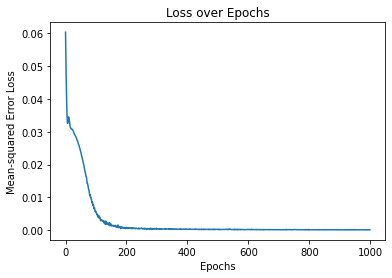

In [ ]:
plt.plot(epoch_loss)
plt.xlabel('Epochs')
plt.ylabel('Mean-squared Error Loss')
plt.title('Loss over Epochs')
plt.show()

In [ ]:
# df_X_ss_trans = ss.transform(X) #old transformers
# df_y_mm_trans = mm.transform(y) #old transformers

# df_X_ss_tensor = Variable(torch.Tensor(df_X_ss_trans)) #converting to Tensors
# df_y_mm_tensor = Variable(torch.Tensor(df_y_mm_trans))

In [ ]:
# reshaping the dataset
# df_X_ss = torch.reshape(df_X_ss, (131, 6, df_X_ss.shape[1]))
# df_X_ss = torch.reshape(df_X_ss_tensor, (240, 6, df_X_ss_tensor.shape[1]))

In [ ]:
df_X_ss = ss.transform(X) #old transformers
df_y_mm = mm.transform(y) #old transformers

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
# reshaping the dataset
# df_X_ss = torch.reshape(df_X_ss, (131, 6, df_X_ss.shape[1]))
df_X_ss = torch.reshape(df_X_ss, (240, 6, df_X_ss.shape[1]))

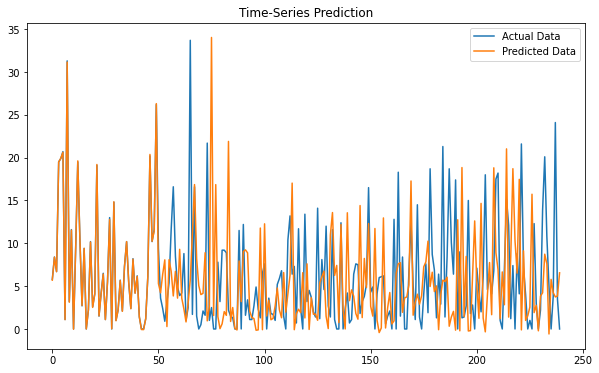

In [ ]:
lstm1.eval()
train_predict = lstm1(df_X_ss)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting

plt.plot(dataY_plot, label='Actual Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

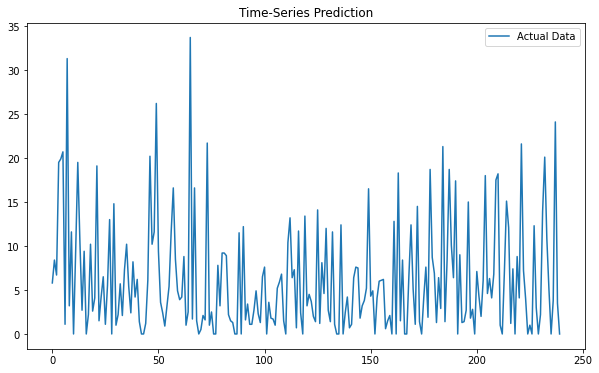

In [ ]:
plt.figure(figsize=(10,6)) #plotting

plt.plot(dataY_plot, label='Actual Data') #actual plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [ ]:
df_X_ss_trans = ss.transform(X) #old transformers
df_y_mm_trans = mm.transform(y) #old transformers

df_X_ss_trans_test = df_X_ss_trans[(200*6):, :]
df_y_mm_trans_test = df_y_mm_trans[200:, :] 

df_X_ss_tensor = Variable(torch.Tensor(df_X_ss_trans_test)) #converting to Tensors
df_y_mm_tensor = Variable(torch.Tensor(df_y_mm_trans_test))

In [ ]:
# reshaping the dataset
# df_X_ss = torch.reshape(df_X_ss, (131, 6, df_X_ss.shape[1]))
df_X_ss = torch.reshape(df_X_ss_tensor, (40, 6, df_X_ss_tensor.shape[1]))

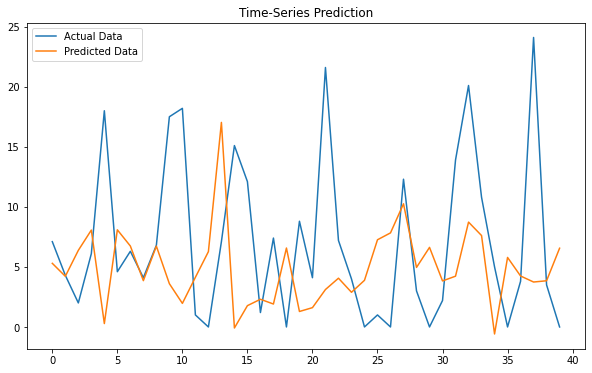

In [ ]:
lstm1.eval()
train_predict = lstm1(df_X_ss)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = df_y_mm_tensor.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting

plt.plot(dataY_plot, label='Actual Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [ ]:
%pip install torchinfo
from torchinfo import summary


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
summary(
    LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]),
    (240, 6,11), #df_X_ss.shape,
    verbose=1,
    col_width=16,
    col_names=["kernel_size", "output_size", "num_params"], #"mult_adds"
    row_settings=["var_names"],
)

Layer (type (var_name))                  Kernel Shape     Output Shape     Param #
LSTM1 (LSTM1)                            --               [240, 1]         --
├─LSTM (lstm)                            --               [240, 6, 50]     73,800
├─ReLU (relu)                            --               [240, 200]       --
├─Linear (fc_1)                          --               [240, 100]       20,100
├─ReLU (relu)                            --               [240, 100]       --
├─Linear (fc)                            --               [240, 1]         101
Total params: 94,001
Trainable params: 94,001
Non-trainable params: 0
Total mult-adds (M): 111.12
Input size (MB): 0.06
Forward/backward pass size (MB): 0.77
Params size (MB): 0.38
Estimated Total Size (MB): 1.21


Layer (type (var_name))                  Kernel Shape     Output Shape     Param #
LSTM1 (LSTM1)                            --               [240, 1]         --
├─LSTM (lstm)                            --               [240, 6, 50]     73,800
├─ReLU (relu)                            --               [240, 200]       --
├─Linear (fc_1)                          --               [240, 100]       20,100
├─ReLU (relu)                            --               [240, 100]       --
├─Linear (fc)                            --               [240, 1]         101
Total params: 94,001
Trainable params: 94,001
Non-trainable params: 0
Total mult-adds (M): 111.12
Input size (MB): 0.06
Forward/backward pass size (MB): 0.77
Params size (MB): 0.38
Estimated Total Size (MB): 1.21

In [ ]:
torch.save(lstm1, "/content/drive/MyDrive/Colab Notebooks/Digethic/Projektarbeit/Data/NFLWideReceiverDataPrediction.pt")

In [ ]:
# Model class must be defined somewhere
# model = torch.load(/content/drive/MyDrive/Colab Notebooks/Digethic/Projektarbeit/Data/NFLWideReceiverDataPrediction.pt)
# model.eval()